# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [25]:
# student 1: Ohad 3016
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

Train set:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test set:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1

Missing values in train set:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Missing values in test s

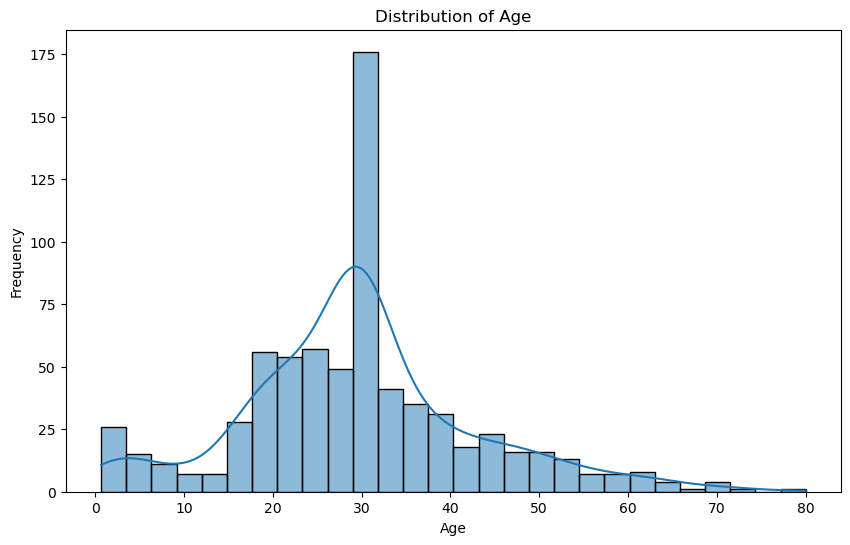

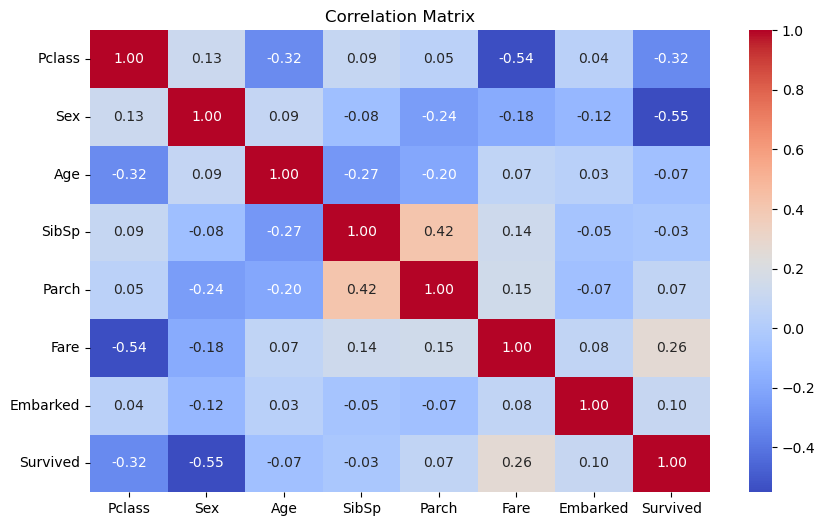

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic datasets
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

# Display the first 5 rows of each dataset
print("Train set:")
print(train.head())

print("\nTest set:")
print(test.head())

# Basic EDA
# Checking for missing values
print("\nMissing values in train set:")
print(train.isnull().sum())

print("\nMissing values in test set:")
print(test.isnull().sum())

# Descriptive statistics
print("\nTrain set statistics:")
print(train.describe())


# Visualization 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Handling missing values and feature scaling
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Numeric transformer with scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer with encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combined preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Experiment 1: Logistic Regression
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter to avoid convergence issues
])

# Setting hyperparameters for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1.0, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=5, scoring='f1_macro')
grid_search_lr.fit(train.drop(columns=['Survived']), train['Survived'])

# Assign the best Logistic Regression model
best_lr_pipeline = grid_search_lr.best_estimator_

# Displaying results of Logistic Regression
print("Best parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best cross-validation score (Logistic Regression):", grid_search_lr.best_score_)

# Experiment 2: Random Forest
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Setting hyperparameters for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 20]
}

grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf.fit(train.drop(columns=['Survived']), train['Survived'])

# Assign the best Random Forest model
best_rf_pipeline = grid_search_rf.best_estimator_

# Displaying results of Random Forest
print("Best parameters (Random Forest):", grid_search_rf.best_params_)
print("Best cross-validation score (Random Forest):", grid_search_rf.best_score_)


# Experiment 3: Polynomial Logistic Regression (Feature Engineering)
poly_features = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter
])

# Setting hyperparameters for Polynomial Logistic Regression
param_grid_poly_lr = {
    'poly__degree': [2],
    'classifier__C': [0.1, 1.0, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search_poly_lr = GridSearchCV(poly_features, param_grid=param_grid_poly_lr, cv=5, scoring='f1_macro')
grid_search_poly_lr.fit(train.drop(columns=['Survived']), train['Survived'])

# Displaying results of Polynomial Logistic Regression
print("Best parameters (Polynomial Logistic Regression):", grid_search_poly_lr.best_params_)
print("Best cross-validation score (Polynomial Logistic Regression):", grid_search_poly_lr.best_score_)

# Compare results in a summary dataframe
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Polynomial Logistic Regression'],
    'Best CV Score': [
        grid_search_lr.best_score_,
        grid_search_rf.best_score_,
        grid_search_poly_lr.best_score_
    ],
    'Best Parameters': [
        grid_search_lr.best_params_,
        grid_search_rf.best_params_,
        grid_search_poly_lr.best_params_
    ]
})

print("\nSummary of model performance:")
print(results)


Best parameters (Logistic Regression): {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best cross-validation score (Logistic Regression): 0.7872419143671257
Best parameters (Random Forest): {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Best cross-validation score (Random Forest): 0.8001908536015463
Best parameters (Polynomial Logistic Regression): {'classifier__C': 1.0, 'classifier__solver': 'liblinear', 'poly__degree': 2}
Best cross-validation score (Polynomial Logistic Regression): 0.7904127549167715

Summary of model performance:
                            Model  Best CV Score  \
0             Logistic Regression       0.787242   
1                   Random Forest       0.800191   
2  Polynomial Logistic Regression       0.790413   

                                     Best Parameters  
0  {'classifier__C': 0.1, 'classifier__solver': '...  
1  {'classifier__max_depth': 10, 'classifier__n_e...  
2  {'classifier__C': 1.0, 'classifier__solver': '...  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [29]:
# Select the model that achieved the best performance in the previous experiments
# Check the DataFrame of model results and identify which one had the highest score
best_model_pipeline = grid_search_rf.best_estimator_  # For example, select Random Forest if it achieved the best performance

# Train the selected model on the entire train set
best_model_pipeline.fit(train.drop(columns=['Survived']), train['Survived'])

# Now the model has been retrained on the entire train set, and we are ready to proceed with predictions on the test set



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50))])

## Part 5 - Apply on test and show model performance estimation

In [33]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Check if the 'PassengerId' column exists in the test data
if 'PassengerId' in test.columns:
    test_features = test.drop(columns=['PassengerId'])
    passenger_ids = test['PassengerId']
else:
    test_features = test.copy()
    passenger_ids = pd.Series(range(len(test_features)), name='PassengerId')

# Make predictions with the best Logistic Regression model
lr_predictions = best_lr_pipeline.predict(test_features)

# Make predictions with the best Random Forest model
rf_predictions = best_rf_pipeline.predict(test_features)

# Create DataFrames to show predictions
lr_predictions_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': lr_predictions})
rf_predictions_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': rf_predictions})

# Show the first 5 predictions from both models
print("Logistic Regression Predictions (first 5):")
print(lr_predictions_df.head())

print("\nRandom Forest Predictions (first 5):")
print(rf_predictions_df.head())

# Optional: Save predictions to CSV files
lr_predictions_df.to_csv('lr_predictions.csv', index=False)
rf_predictions_df.to_csv('rf_predictions.csv', index=False)

# Calculate true labels from the test set
y_true = test['Survived']

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_true, lr_predictions)
lr_recall = recall_score(y_true, lr_predictions)
lr_precision = precision_score(y_true, lr_predictions)
lr_f1 = f1_score(y_true, lr_predictions)
lr_conf_matrix = confusion_matrix(y_true, lr_predictions)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print("Confusion Matrix:")
print(lr_conf_matrix)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_recall = recall_score(y_true, rf_predictions)
rf_precision = precision_score(y_true, rf_predictions)
rf_f1 = f1_score(y_true, rf_predictions)
rf_conf_matrix = confusion_matrix(y_true, rf_predictions)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print("Confusion Matrix:")
print(rf_conf_matrix)


Logistic Regression Predictions (first 5):
   PassengerId  Survived
0            0         0
1            1         0
2            2         0
3            3         1
4            4         0

Random Forest Predictions (first 5):
   PassengerId  Survived
0            0         0
1            1         0
2            2         0
3            3         1
4            4         1

Logistic Regression Metrics:
Accuracy: 0.7709
Recall: 0.6721
Precision: 0.6613
F1 Score: 0.6667
Confusion Matrix:
[[97 21]
 [20 41]]

Random Forest Metrics:
Accuracy: 0.8659
Recall: 0.7377
Precision: 0.8491
F1 Score: 0.7895
Confusion Matrix:
[[110   8]
 [ 16  45]]
